# Artificial neural network - Classification

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
from neural_network import Layer

### Generate training and test sets

In [3]:
size = 300
r = 6
# blob 1
x = np.random.normal(4,2,(size))
y = np.random.normal(1,2,(size))
# blob 2
x2 = np.zeros(size)
y2 = np.zeros(size)
for i in range(size):
    x2[i] = 4+r*math.cos(2*math.pi*(i/size))# + 
    y2[i] = 1+r*math.sin(2*math.pi*(i/size))# + 
x2+=np.random.normal(0,1.5,(size))
y2+=np.random.normal(0,1.5,(size))

x = np.concatenate((x,x2))
y = np.concatenate((y,y2))
# add xy together 
X = np.hstack((x,y)).reshape(2,2*size).T
# reuse y for flags
y[:size] = 1
y[size:] = 0

#shuffle
mask = np.random.permutation(len(X))
X = X[mask]
y = y[mask]

In [4]:
# data
s = size//2
# test set
# blob 1
tx = np.random.normal(4,1.5,s)
ty = np.random.normal(1,1.5,s)
# blob 2
tx2 = np.zeros(s)
ty2 = np.zeros(s)
for i in range(s):
    tx2[i] = 4+r*math.cos(2*math.pi*(i/s))# + 
    ty2[i] = 1+r*math.sin(2*math.pi*(i/s))# + 
tx2+=np.random.normal(0,1,s)
ty2+=np.random.normal(0,1,s)

tx = np.concatenate((tx,tx2))
ty = np.concatenate((ty,ty2))
# add xy together, add intercept 
tX = np.hstack((tx,ty)).reshape(2,size).T
# reuse y for flags
ty[:s] = 1
ty[s:] = -1

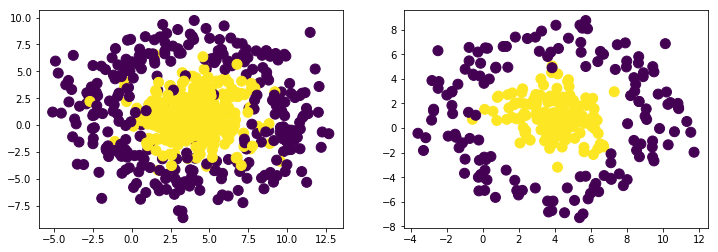

In [5]:
fig, axes = plt.subplots(ncols=2,figsize=(12,4))
axes[0].scatter(X[:,0],X[:,1],c=y,s=100)
axes[1].scatter(tX[:,0],tX[:,1],c=ty,s=100)
plt.show()

### The network

In [6]:
# input are x and y coordinates
input_layer = Layer(2)

In [7]:
# two hidden layers, with 16 neurons each - this should be enough to find non-linear patterns
hidden_1 = Layer(16,input_layer,activation='ReLU')
hidden_2 = Layer(16,hidden_1,activation='ReLU')

In [8]:
# output layer gives 0 or 1
output_layer = Layer(1,hidden_2,activation='sigmoid')

**Train the network**

In [9]:
# epochs loop
for epoch in range(50):
    # go over all the datapoints
    for i in range(len(X)):
        # forward propagate to get the activations
        input_layer.feed_forward(X[i])
        # back propagate to correct the weights and biases
        output_layer.back_propagate(y[i],learning_rate=0.001)

**Prediction method for convenience**

In [10]:
def predict(X):
    pred = np.zeros(len(X))
    for i in range(len(X)):
        p = input_layer.feed_forward(X[i])
        if p>=0.5:
            pred[i] = 1
    return pred

### Visualize classification boundary

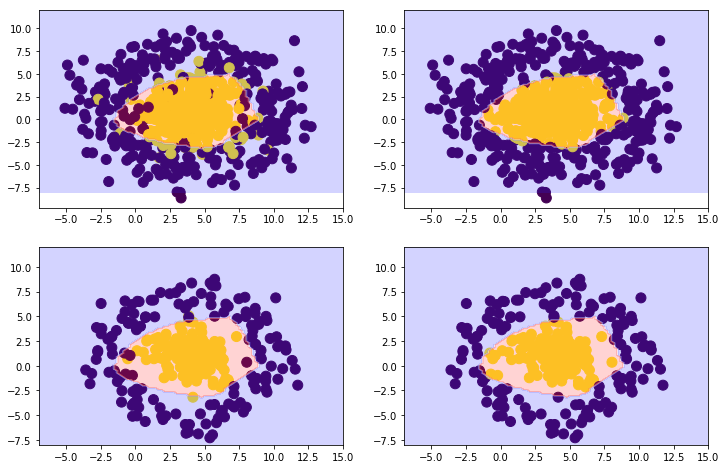

In [11]:
xxx = np.linspace(-7,15,100)
yyy = np.linspace(-8,12,100)
xx, yy = np.meshgrid(xxx,yyy)
Z = predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape((xx.shape))
fig, axes = plt.subplots(ncols=2,nrows=2,figsize=(12,8))
axes[0][0].scatter(X[:,0],X[:,1],c=y,s=100)
axes[1][0].scatter(tX[:,0],tX[:,1],c=ty,s=100)
axes[0][0].contourf(xx,yy,Z,alpha=0.2,cmap='bwr')
axes[1][0].contourf(xx,yy,Z,alpha=0.2,cmap='bwr')

pred = predict(X)
tpred = predict(tX)
axes[0][1].scatter(X[:,0],X[:,1],c=pred,s=100)
axes[1][1].scatter(tX[:,0],tX[:,1],c=tpred,s=100)
axes[0][1].contourf(xx,yy,Z,alpha=0.2,cmap='bwr')
axes[1][1].contourf(xx,yy,Z,alpha=0.2,cmap='bwr')
plt.show()

### More complex patterns

In [12]:
import math
spiral = np.random.normal(0,1,(500,2))
flag = np.zeros((500))

for i in range(500):
    x = spiral[i,0]
    y = spiral[i,1]
    
    if (2*math.tanh(x*2)>y):
        if (math.tanh(x)<y):
            flag[i] =1
    if (2*math.tanh(x*2)<-y):
        if (math.tanh(x)>-y):
            flag[i] =1

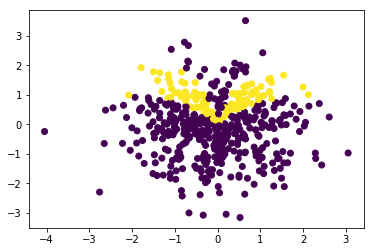

In [13]:
plt.scatter(spiral[:,0],spiral[:,1],c=flag)
plt.show()

In [14]:
# reset network (to reset weights that were adjusted to a different pattern)
input_layer = Layer(2)
hidden_1 = Layer(16,input_layer,activation='ReLU')
hidden_2 = Layer(16,hidden_1,activation='ReLU')
output_layer = Layer(1,hidden_2,activation='sigmoid')

In [15]:
for epoch in range(100):
    for i in range(len(spiral)):
        input_layer.feed_forward(spiral[i])
        output_layer.back_propagate(flag[i],learning_rate=0.01)

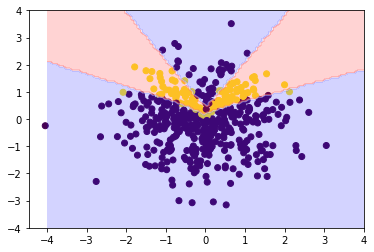

In [16]:
xxx = np.linspace(-4,4,100)
yyy = np.linspace(-4,4,100)
xx, yy = np.meshgrid(xxx,yyy)
Z = predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape((xx.shape))

plt.scatter(spiral[:,0],spiral[:,1],c=flag)
plt.contourf(xx,yy,Z,alpha=0.2,cmap='bwr')

plt.show()

### Even more complex pattern

In [17]:
import math
ying = np.random.normal(0,1,(1000,2))
yang = np.zeros((1000))

for i in range(1000):
    x = ying[i,0]
    y = ying[i,1]
    
    if (math.atan2(y,x)-0.8*(x**2+y**2)<x**2+y**2<math.atan2(y,x)+0.2*(x**2+y**2)):
            yang[i] =1
    if (-math.atan2(y,-x)-0.8*(x**2+y**2)<x**2+y**2<-math.atan2(y,-x)+0.2*(x**2+y**2)):
            yang[i] =1

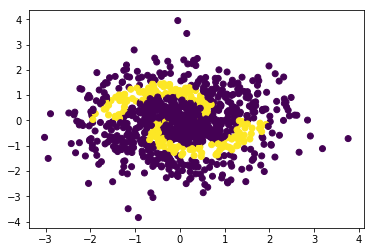

In [18]:
plt.scatter(ying[:,0],ying[:,1],c=yang)
plt.show()

In [19]:
# reset network again
input_layer = Layer(2)
hidden_1 = Layer(16,input_layer,activation='ReLU')
hidden_2 = Layer(16,hidden_1,activation='ReLU')
output_layer = Layer(1,hidden_2,activation='sigmoid')

In [20]:
for epoch in range(200):
    for i in range(len(ying)):
        input_layer.feed_forward(ying[i])
        output_layer.back_propagate(yang[i],learning_rate=0.01)

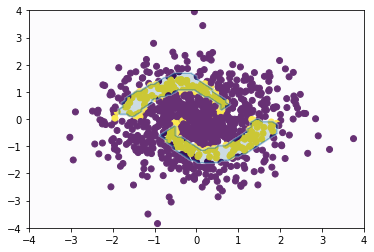

In [21]:
xxx = np.linspace(-4,4,100)
yyy = np.linspace(-4,4,100)
xx, yy = np.meshgrid(xxx,yyy)
Z = predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape((xx.shape))

plt.scatter(ying[:,0],ying[:,1],c=yang)
plt.contourf(xx,yy,Z,alpha=0.2,cmap='PuBu')

plt.show()